In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import numpy as np
np.random.seed(0)

In [2]:
import yfinance as yf
df_new = yf.download(tickers='BMW.DE', period='2y', interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import pandas as pd
df_cleaned=pd.read_csv('C:\\SMP\\notebook\\df_cleaned.csv')

In [4]:
# Selecting the subset of columns for features
X = df_cleaned.drop(['Candle_direction'],axis='columns')


# Extracting the target variable
y = df_cleaned['Candle_direction']

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,      # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialize the NN
model = Sequential()

# Adding layers with Batch Normalization and Dropout
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=39))
model.add(BatchNormalization())
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN with a custom optimizer
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN with validation split and early stopping callback
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.2)


Epoch 1/150
82/82 [==============================] - 5s 13ms/step - loss: 0.9497 - accuracy: 0.5036 - val_loss: 16.1952 - val_accuracy: 0.4634
Epoch 2/150
82/82 [==============================] - 1s 7ms/step - loss: 0.8739 - accuracy: 0.5147 - val_loss: 5.3479 - val_accuracy: 0.4634
Epoch 3/150
82/82 [==============================] - 1s 6ms/step - loss: 0.8159 - accuracy: 0.5311 - val_loss: 2.1198 - val_accuracy: 0.4634
Epoch 4/150
82/82 [==============================] - 1s 7ms/step - loss: 0.8232 - accuracy: 0.5063 - val_loss: 1.0259 - val_accuracy: 0.4665
Epoch 5/150
82/82 [==============================] - 1s 7ms/step - loss: 0.7807 - accuracy: 0.5181 - val_loss: 0.7337 - val_accuracy: 0.4893
Epoch 6/150
82/82 [==============================] - 1s 6ms/step - loss: 0.7582 - accuracy: 0.5364 - val_loss: 0.7329 - val_accuracy: 0.5229
Epoch 7/150
82/82 [==============================] - 1s 6ms/step - loss: 0.7713 - accuracy: 0.5166 - val_loss: 0.7162 - val_accuracy: 0.5457
Epoch 8/150

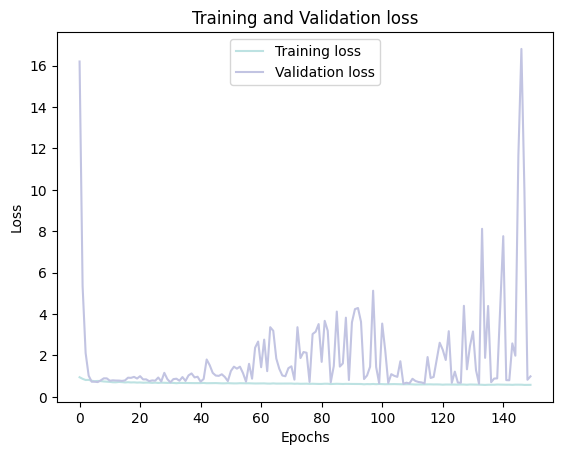

In [6]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

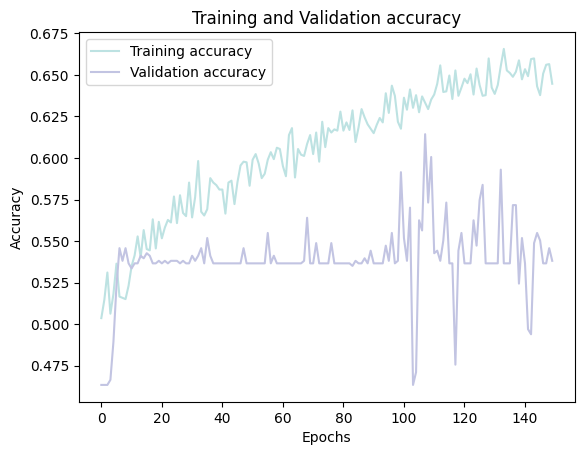

In [7]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
X_test_new=X_test.reset_index(drop=True)
X_test_new

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,...,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal
0,2023,10,20,12,0,0,0,0,0,0,...,1,0,0,0.0,0,0,0.000000,0,0,2
1,2022,11,10,10,0,0,0,0,0,0,...,0,0,0,0.0,0,2,79.989998,0,0,1
2,2023,9,13,15,0,0,0,0,0,0,...,1,0,0,0.0,1,0,0.000000,0,0,2
3,2023,1,23,10,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.000000,0,0,1
4,2023,3,29,11,0,0,0,0,0,0,...,1,0,0,0.0,0,0,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2022,12,27,14,0,0,0,0,0,0,...,1,0,0,0.0,0,0,0.000000,0,0,1
816,2022,12,20,11,0,0,2,0,0,0,...,1,0,0,0.0,0,1,83.279999,0,0,1
817,2024,5,21,11,0,0,2,0,0,0,...,1,0,0,0.0,0,0,0.000000,0,0,1
818,2023,5,23,15,0,0,0,0,0,0,...,1,0,0,0.0,0,0,0.000000,0,0,1


In [9]:
import numpy as np

# Assuming 2023, 8, 30, 5, 0 are the values you want to predict on
input_data = np.array([[2024,3, 4 , 16, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                       ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  # Convert the values into a 2D array

# Perform prediction
prediction = model.predict(input_data)

print(prediction)


1/1 [==============================] - 0s 423ms/step
[[0.27006283]]


In [12]:
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)
print(y_pred)


[[0.06490645]
 [0.9064969 ]
 [0.18030292]
 [0.9995165 ]
 [0.04395107]
 [0.9975432 ]
 [0.17734285]
 [0.14315107]
 [0.03911772]
 [0.99861246]
 [0.05131977]
 [0.11845788]
 [0.08842562]
 [0.11628111]
 [0.06731316]
 [0.10654805]
 [0.85807896]
 [0.1342609 ]
 [0.99568844]
 [0.16787066]
 [0.0682598 ]
 [0.9970954 ]
 [0.09347293]
 [0.7957363 ]
 [0.14826433]
 [0.09280742]
 [0.14346153]
 [0.8432283 ]
 [0.21028753]
 [0.14335321]
 [0.06925084]
 [0.14629729]
 [0.22852086]
 [0.05450638]
 [0.03245135]
 [0.0907237 ]
 [0.11033738]
 [0.13491908]
 [0.11178111]
 [0.07888038]
 [0.08162335]
 [0.10739217]
 [0.11042644]
 [0.06049735]
 [0.15645315]
 [0.08722941]
 [0.13201214]
 [0.17404352]
 [0.06800286]
 [0.04154165]
 [0.13786046]
 [0.11420964]
 [0.16171008]
 [0.18503705]
 [0.90333354]
 [0.9991542 ]
 [0.22430462]
 [0.20698158]
 [0.10335077]
 [0.8828477 ]
 [0.20938511]
 [0.189166  ]
 [0.1813243 ]
 [0.04133989]
 [0.08745622]
 [0.12050044]
 [0.08442119]
 [0.19226505]
 [0.29702798]
 [0.21002829]
 [0.9992838 ]
 [0.99

In [42]:
import pandas as pd

# Convert the array to a Series
y_pred_series = pd.Series(y_pred.flatten())

# Print the Series
print(y_pred_series)


0      0.354584
1      0.375261
2      0.554768
3      0.433374
4      0.577525
         ...   
815    0.555214
816    0.202157
817    0.646666
818    0.519498
819    0.226689
Length: 820, dtype: float32


In [43]:
y_pred_mean=y_pred_series.mean()
y_pred_mean

0.47210395

In [44]:
y_pred_new = (y_pred > y_pred_mean)

In [45]:
import pandas as pd

# Convert the array to a Series
y_pred_new_series = pd.Series(y_pred_new.flatten())

# Print the Series
print(y_pred_new_series)

0      False
1      False
2       True
3      False
4       True
       ...  
815     True
816    False
817     True
818     True
819    False
Length: 820, dtype: bool


In [46]:
pd.set_option('display.max_columns', None)
y_test

2820    0
889     1
2607    1
1293    1
1670    1
       ..
1149    0
1114    1
3988    0
1962    1
2631    0
Name: Candle_direction, Length: 820, dtype: int64

In [47]:
concatenated_df = pd.concat([y_pred_new_series, X_test_new],axis='columns')

In [48]:
import pandas as pd

# Assuming you have DataFrame df with columns 'Year', 'Month', 'Day', 'Hour', and 'Minute'
# Create a DataFrame with these columns
date_time_df = pd.DataFrame({
    'Year': concatenated_df['Year'],
    'Month': concatenated_df['Month'],
    'Day': concatenated_df['Day'],
    'Hour': concatenated_df['Hour'],
    'Minute': concatenated_df['Minute']
})

# Concatenate date and time columns into a single string column
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df)
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')  # No timezone specified here
else:
    date_time_df['DateTime'] = pd.to_datetime(date_time_df[['Year', 'Month', 'Day']])
    date_time_df['DateTime'] = date_time_df['DateTime'].dt.strftime('%Y-%m-%d')  # No timezone specified here

# Convert the DataFrame to a datetime index
date_time_index = pd.to_datetime(date_time_df['DateTime'], utc=True)  # Make the index timezone aware

# Assign the datetime index back to your DataFrame
concatenated_df.index = date_time_index

# Drop the date-time features columns if needed
if 'Hour' in concatenated_df.columns and 'Minute' in concatenated_df.columns:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
else:
    concatenated_df = concatenated_df.drop(columns=['Year', 'Month', 'Day'])

In [52]:
import pandas as pd

# Concatenate the two DataFrames along axis 0 (rows)
# This will stack the DataFrames on top of each other
concatenated_df_new = pd.concat([concatenated_df, df_new], axis='columns')
concatenated_df_new=concatenated_df_new.drop(columns=['EMASignal', 'isPivot', 'CHOCH_pattern_detected',
                                  'fibonacci_signal','MinSwing','MaxSwing','SL','TP',
                                 'LBD_detected','LBH_detected','SR_signal','isBreakOut','candlestick_signal',
                                 'result','signal1','buy_signal','Position','sell_signal','fractal_high',
                                 'fractals_low','VSignal','PriceSignal','TotSignal','SLSignal','grid_signal',
                                 'ordersignal','SLSignal_heiken','EMASignal1','long_signal','martiangle_signal',
                                                     'fractal_low','buy_signal1','sell_signal1','fractals_high'])




In [53]:
concatenated_df_new=concatenated_df_new.fillna(0)

In [54]:
import pandas as pd

# Convert boolean column 'A' to integer
concatenated_df_new[0] = concatenated_df_new[0].astype(int)

# Display the DataFrame after conversion

#concatenated_df_new = concatenated_df_new[concatenated_df_new['Volume'] != 0]
concatenated_df_new = concatenated_df_new[(concatenated_df_new[['Open', 'Close', 'High', 'Low']] != 0).all(axis=1)]
concatenated_df_new

,0,Open,High,Low,Close,Adj Close,Volume
2022-06-10 07:00:00+00:00,0,81.959999,82.260002,81.580002,81.599998,81.599998,0.0
2022-06-10 08:00:00+00:00,0,81.570000,82.040001,81.360001,81.400002,81.400002,200945.0
2022-06-10 09:00:00+00:00,0,81.470001,82.169998,81.430000,82.019997,82.019997,104718.0
2022-06-10 10:00:00+00:00,0,82.040001,82.110001,81.480003,81.660004,81.660004,50018.0
2022-06-10 11:00:00+00:00,1,81.750000,82.019997,81.620003,82.010002,82.010002,46845.0
...,...,...,...,...,...,...,...
2024-06-07 11:00:00+00:00,0,90.480003,90.559998,90.260002,90.519997,90.519997,62891.0
2024-06-07 12:00:00+00:00,0,90.500000,90.660004,90.199997,90.300003,90.300003,45627.0
2024-06-07 13:00:00+00:00,0,90.279999,91.180000,90.260002,90.900002,90.900002,55192.0
2024-06-07 14:00:00+00:00,0,90.900002,91.419998,90.900002,91.199997,91.199997,46251.0


In [55]:
concatenated_df_new[concatenated_df_new[0]!=0]

,0,Open,High,Low,Close,Adj Close,Volume
2022-06-10 11:00:00+00:00,1,81.750000,82.019997,81.620003,82.010002,82.010002,46845.0
2022-06-13 11:00:00+00:00,1,78.550003,78.849998,78.349998,78.489998,78.489998,88854.0
2022-06-13 12:00:00+00:00,1,78.510002,78.940002,78.440002,78.580002,78.580002,94405.0
2022-06-14 11:00:00+00:00,1,77.199997,77.519997,77.000000,77.419998,77.419998,86528.0
2022-06-15 14:00:00+00:00,1,79.540001,79.889999,79.540001,79.739998,79.739998,89211.0
...,...,...,...,...,...,...,...
2024-05-30 10:00:00+00:00,1,92.419998,92.639999,92.360001,92.519997,92.519997,23464.0
2024-05-30 15:00:00+00:00,1,92.620003,92.860001,92.480003,92.860001,92.860001,33951.0
2024-05-31 12:00:00+00:00,1,92.900002,93.199997,92.779999,93.139999,93.139999,63513.0
2024-06-03 11:00:00+00:00,1,93.860001,94.019997,93.839996,93.919998,93.919998,21055.0


In [56]:
concatenated_df_new_filtered = concatenated_df_new['2024-04-02 02:00:00+00:00':]

In [57]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.Low[i]>df1.Low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.Low[i]<df1.Low[i-1]):
            return 0
    return 1

#support(df,46,3,2)

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.High[i]<df1.High[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.High[i]>df1.High[i-1]):
            return 0
    return 1
#resistance(df, 30, 3, 5)


In [58]:
sr = []
n1=3
n2=2
for row in range(3, len(concatenated_df_new_filtered)-n2): #len(df)-n2
    if support(concatenated_df_new_filtered, row, n1, n2):
        sr.append((row,concatenated_df_new_filtered.Low[row],1))
    if resistance(concatenated_df_new_filtered, row, n1, n2):
        sr.append((row,concatenated_df_new_filtered.High[row],2))
print(sr)

[(5, 107.80000305175781, 2), (20, 115.25, 2), (29, 111.9000015258789, 1), (38, 114.75, 2), (67, 111.19999694824219, 1), (69, 112.3499984741211, 2), (79, 108.6500015258789, 1), (80, 108.6500015258789, 1), (87, 111.75, 2), (90, 106.44999694824219, 1), (101, 107.25, 2), (116, 107.44999694824219, 2), (137, 105.05000305175781, 1), (144, 107.30000305175781, 2), (150, 105.75, 1), (160, 104.30000305175781, 1), (211, 103.80000305175781, 2), (217, 102.69999694824219, 1), (221, 102.6500015258789, 1), (231, 99.87999725341797, 1), (234, 101.25, 2), (239, 101.8499984741211, 2), (253, 102.69999694824219, 2), (263, 104.6500015258789, 2), (270, 103.19999694824219, 1), (297, 95.41999816894531, 1), (321, 93.41999816894531, 2), (327, 92.94000244140625, 1), (338, 92.4800033569336, 1), (339, 92.4800033569336, 1), (347, 93.83999633789062, 2), (356, 94.12000274658203, 2), (383, 93.19999694824219, 2), (388, 94.44000244140625, 2), (398, 91.4000015258789, 1), (411, 92.23999786376953, 2), (419, 91.22000122070312,

In [59]:
#from pyngrok import ngrok
import numpy as np
import plotly.graph_objects as go

# Assuming concatenated_df_new is already defined
def pointpos(x):
    if x[0] == 1:
        return x['Low'] + 0.5e-3
    else:
        return np.nan

concatenated_df_new_filtered['pointpos'] = concatenated_df_new_filtered.apply(lambda row: pointpos(row), axis=1)

fig = go.Figure(data=[go.Candlestick(x=concatenated_df_new_filtered.index,
                open=concatenated_df_new_filtered['Open'],
                high=concatenated_df_new_filtered['High'],
                low=concatenated_df_new_filtered['Low'],
                close=concatenated_df_new_filtered['Close'])])

fig.add_scatter(x=concatenated_df_new_filtered.index,
                y=concatenated_df_new_filtered['pointpos'],
                mode="markers",
                marker=dict(size=8, color="MediumPurple", line=dict(width=1, color='DarkSlateGrey')),
                name="Signal")

'''for sr_entry in sr:
    fig.add_shape(type='line', x0='2024-03-04 09:15:00+00:00', y0=sr_entry[1],
                  x1='2024-03-04 18:00:00+00:00',
                  y1=sr_entry[1])'''

fig.update_layout(
    title="MASTER'S STRATEGY",
    xaxis_title="Date",
    yaxis_title="Price",
    autosize=False,
    width=800,
    height=700,  # Adjusted height
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgb(30,30,30)',  # Darker plot background
    font=dict(color="white"),  # White font color
    xaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
    yaxis=dict(gridcolor='rgb(50,50,50)'),  # Darker gridlines
)

fig.show()

#ngrok_tunnel = ngrok.connect(8080)
#print('Public URL:', ngrok_tunnel.public_url)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_10936\383667671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_df_new_filtered['pointpos'] = concatenated_df_new_filtered.apply(lambda row: pointpos(row), axis=1)
